# Formula 1 Cars image classification 

In [82]:
import os 
import pandas
import seaborn
import tensorflow as tf
import numpy
import random
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
from shutil import copyfile
import PIL
from PIL import Image
import matplotlib as plt
import shutil

In [83]:
data_dir = os.getcwd()

uint8
(720, 1280, 3)


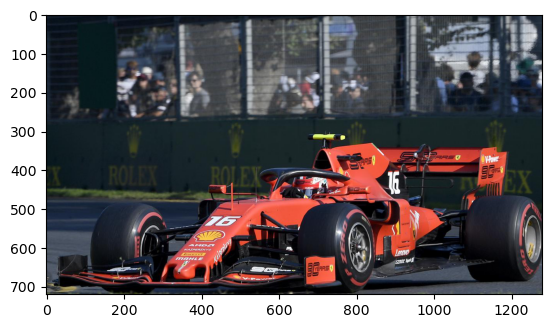

In [84]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
data = image.imread(f'{data_dir}/Ferrari F1 car/00000002.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
pyplot.imshow(data)
pyplot.show()

In [86]:
def find_files_with_different_extension(directory, target_extension):
    different_extension_files = []

    for foldername, subfolders, filenames in os.walk(directory):
        for filename in filenames:
            file_extension = os.path.splitext(filename)[1]
            if file_extension.lower() != target_extension.lower():
                different_extension_files.append(os.path.join(foldername, filename))

    return different_extension_files


target_extension = '.jpg'

different_extension_files = find_files_with_different_extension(data_dir, target_extension)

if different_extension_files:
    print("Files with different extensions:")
    for file_path in different_extension_files:
        new_file_path = os.path.splitext(file_path)[0] + target_extension
        shutil.move(file_path, new_file_path)
    #do nothing

Files with different extensions:


In [92]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to [0, 1]
    rotation_range=20,   # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of the image by up to 20%
    height_shift_range=0.2,  # Randomly shift the height of the image by up to 20%
    shear_range=0.2,   # Shear the image by up to 20%
    zoom_range=0.2,    # Zoom in by up to 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in empty pixels using the nearest available pixel
)


In [93]:
batch_size = 32
image_size = (224, 224)  # You can adjust the image size as needed

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  # or 'binary', depending on your classification problem
    shuffle=True  # Shuffle the order of images
)


Found 2486 images belonging to 8 classes.


In [94]:
# Train the model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = 8 # we are classifying each brand of car

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax') )


In [95]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [96]:
epochs = 10  # Adjust the number of epochs as needed
history = model.fit(train_generator, epochs=epochs)


Epoch 1/10


/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2023-10-27 16:45:28.307747: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-10-27 16:45:29.126348: W tensorflow/core/framework/op_kernel.cc:1818] UNKNOWN: UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x28d137ce0>
Traceback (most recent call last):

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formul

UnknownError: Graph execution error:

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x28d137ce0>
Traceback (most recent call last):

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/keras/engine/data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/keras/engine/data_adapter.py", line 1049, in generator_fn
    yield x[i]
          ~^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/keras/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/keras/utils/image_utils.py", line 423, in load_img
    img = pil_image.open(io.BytesIO(f.read()))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/opt/homebrew/Caskroom/miniconda/base/envs/formula1/lib/python3.11/site-packages/PIL/Image.py", line 3280, in open
    raise UnidentifiedImageError(msg)

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x28d137ce0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2413]